In [24]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib as mpl
from sklearn.linear_model import Perceptron
import numpy as np
import os
import pydotplus as pydot

In [27]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/50
1719/1719 [==============================] - 57s 32ms/step - loss: 0.9652 - accuracy: 0.6504 - val_loss: 0.4917 - val_accuracy: 0.8126
Epoch 2/50
1719/1719 [==============================] - 58s 34ms/step - loss: 0.6174 - accuracy: 0.7754 - val_loss: 0.4449 - val_accuracy: 0.8532
Epoch 3/50
1719/1719 [==============================] - 60s 35ms/step - loss: 0.5318 - accuracy: 0.8164 - val_loss: 0.3840 - val_accuracy: 0.8674
Epoch 4/50
1719/1719 [==============================] - 58s 34ms/step - loss: 0.4767 - accuracy: 0.8388 - val_loss: 0.3376 - val_accuracy: 0.8808
Epoch 5/50
1719/1719 [==============================] - 57s 33ms/step - loss: 0.4412 - accuracy: 0.8541 - val_loss: 0.3266 - val_accuracy: 0.8824
Epoch 6/50
1719/1719 [==============================] - 57s 33ms/step - loss: 0.4169 - accuracy: 0.8623 - val_loss: 0.3344 - val_accuracy: 0.8786
Epoch 7/50
1719/1719 [==============================] - 57s 33ms/step - loss: 0.4019 - accuracy: 0.8671 - val_loss: 0.3158 -

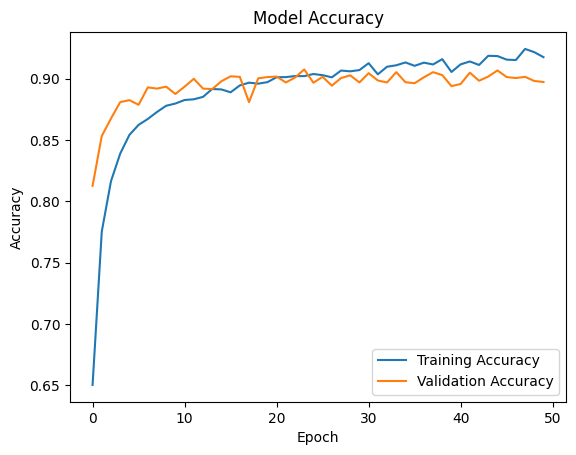

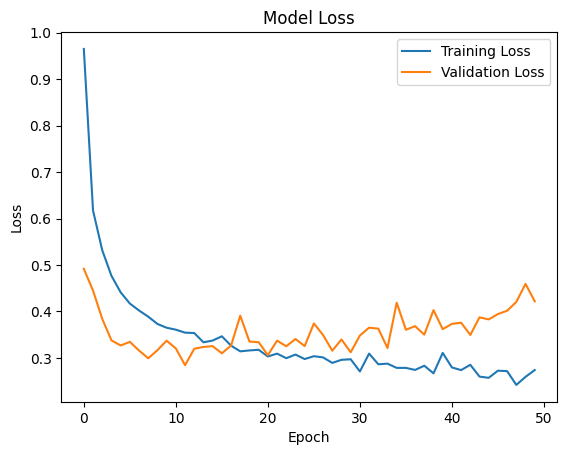

In [36]:
#모델 트레이닝 과정 시각화
import matplotlib.pyplot as plt

# history는 model.fit()의 결과로 반환된 객체입니다.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        1600      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)        

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3780 - accuracy: 0.8967


[0.37803342938423157, 0.8967000246047974]